# Assignment 2

## Part 1

Load the 'divorce_margarine' dataset from the 'dslabs' package. Investigate the correlation
between margarine consumption and divorce rates in Maine. Would an increase in the
preference for margarine lead to skyrocketing divorce rates?

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data(divorce_margarine)
str(divorce_margarine)

'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


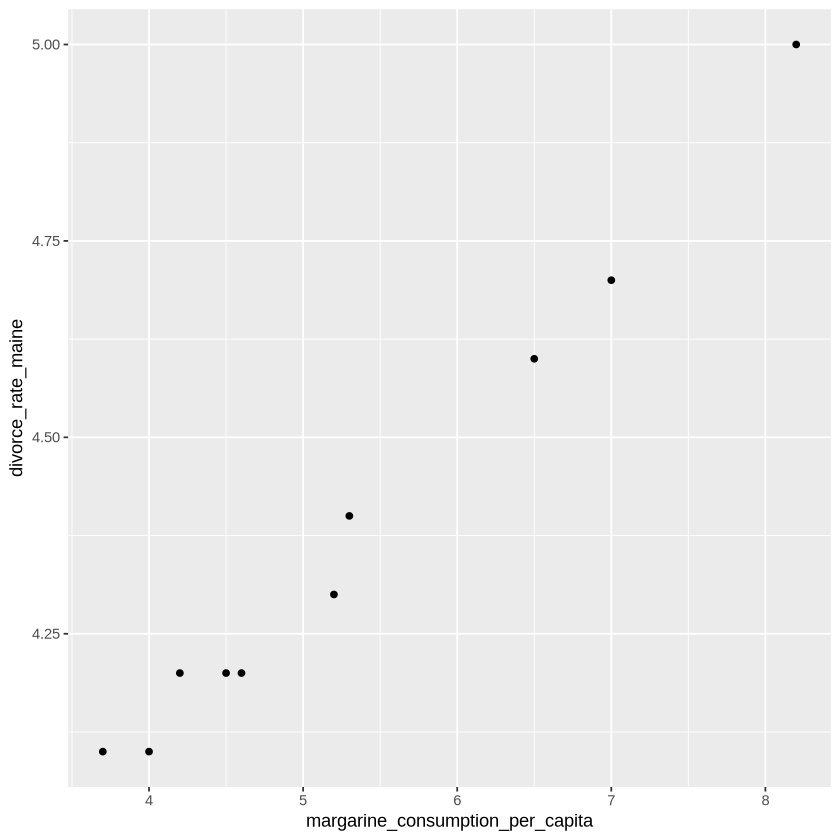

In [4]:
#I create a point plot to investigate the correlation between margarine consumption and divorce rates
ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita, 
           y = divorce_rate_maine))+
    geom_point()

In [5]:
# I do a correlation test to see how margarine consumption and divorce rates correlate
cor.test(divorce_margarine$margarine_consumption_per_capita, divorce_margarine$divorce_rate_maine)


	Pearson's product-moment correlation

data:  divorce_margarine$margarine_consumption_per_capita and divorce_margarine$divorce_rate_maine
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


The point plot and the correlation test(cor.test) shows that there is a strong positive correlation between divorce rate and the margarine consumption
The correlation coefficient is 0.9925585 and the closer to 1 that is the closer the correlation so that is quite close.
It does not mean that eating margarine is what causes the divorce, just that the two variables might be related to the same 3rd variable, which means that a skyrocketing margarine consumption might not lead to more divorces

## Part 2

Load the ‘GSSvocab’ dataset from the ‘car’ package. This dataset contains people’s scores on
an English vocabulary test and includes demographic information

In [6]:
install.packages("car")

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘backports’, ‘cowplot’, ‘Deriv’, ‘modelr’, ‘microbenchmark’, ‘broom’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘survival’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [7]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [8]:
data(GSSvocab)

In [9]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [10]:
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


Filter for the year 1978 and remove rows with missing values (the function na.exclude() is one
way to do this – check out the documentation!).

In [11]:
dat1978<-GSSvocab%>%
    filter(year==1978)
str(dat1978)


'data.frame':	1532 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [12]:
dat1978_na<-na.exclude(dat1978)
str(dat1978_na)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of
education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the
results.

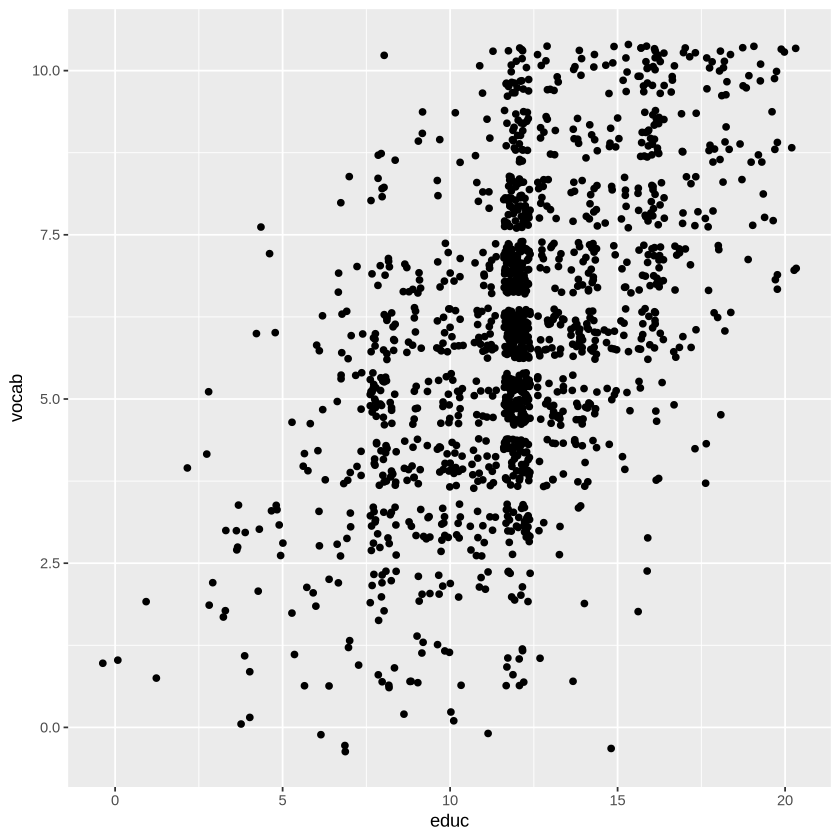

In [13]:
ggplot(dat1978_na,
       aes(x = educ, 
           y = vocab))+
    geom_point(position = "jitter")

In [14]:
vocab_model<- lm(vocab~ educ, dat1978_na)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = dat1978_na)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


**Explanation**
The results show a significant relationship between a persons education and a persons vocabulary as seen by the p-value 2e-16 which is much less than 0.05 which is what the p-value most be below to be significant 

Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially
have an impact on the size of their vocabulary. Visualize the relationship and add the predictor
to the model. Briefly explain the results

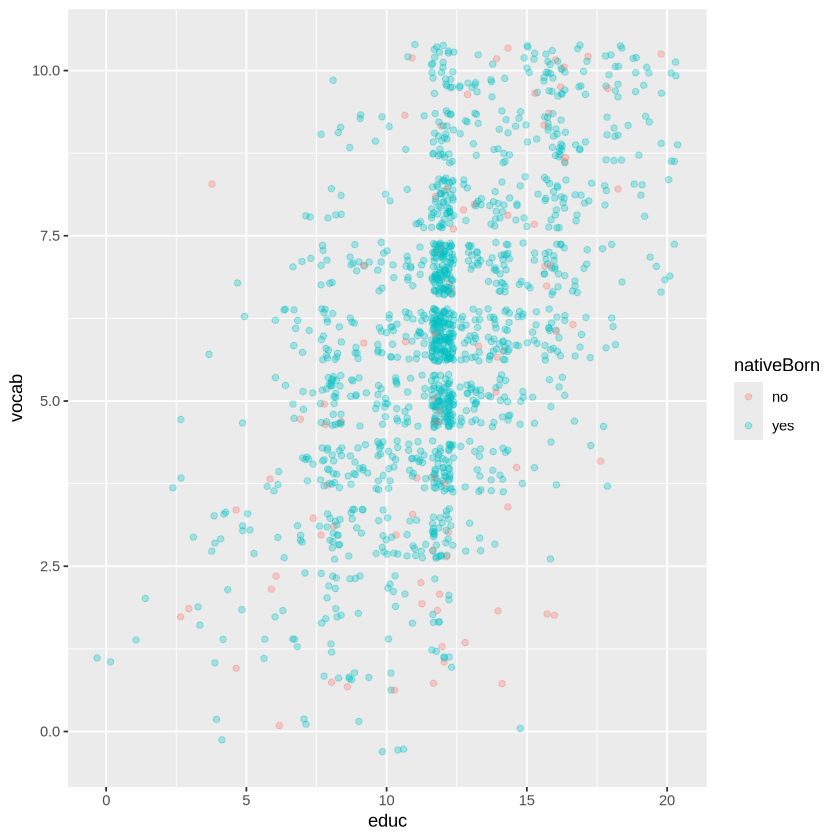

In [22]:
ggplot(dat1978_na,
       aes(x = educ,
           y = vocab,
          color=nativeBorn))+
    geom_point(position = "jitter",
              alpha=0.3)


In [25]:
nb_model<- lm(vocab~ educ * nativeBorn, dat1978_na)
summary(nb_model)


Call:
lm(formula = vocab ~ educ * nativeBorn, data = dat1978_na)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


**Explaination**
The model shows that there is little relationship between the vocabulary of a person and whether or not they are nativeborn. That is seen in the high p-value, which is 0.186 which is above 0.05.
If you look at the graph you can also see that very little if anything has changed between the graph that visualize the realtionship between vocabulary and education and the graph which adds nativeborn as a factor

Does a person’s level of education depend on whether they are a native of the country?
Visualize the relationship. Do you think it makes sense to add the relationship as an interaction
term? Try creating the model and briefly explain the results.

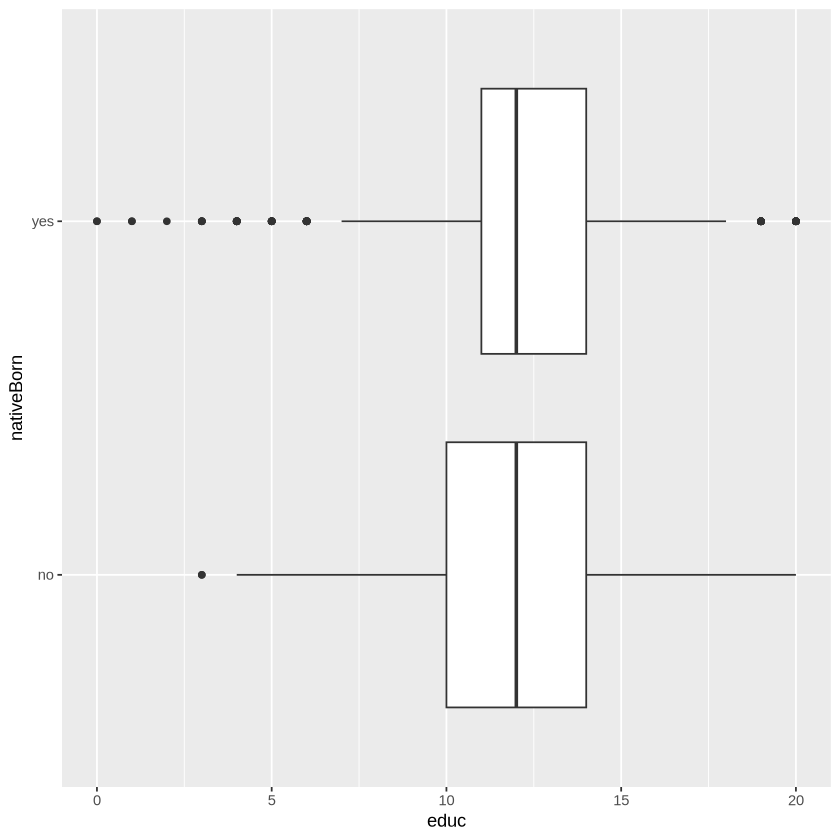

In [17]:
ggplot(dat1978_na,
       aes(x = educ, 
           y = nativeBorn))+
    geom_boxplot()

**Explanation**
The boxplot shows that the median is the same whether or not one is nativeborn and I dont think it makes sense to add to a model as it would explain very little


Which model performs best?

In [33]:
m1<-lm(vocab ~educ, dat1978_na)
m2<-lm(vocab~educ + nativeBorn, dat1978_na)
m3 <-lm(vocab ~educ * nativeBorn, dat1978_na)

anova(m1,m2,m3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


**Explaination**
P value is much better in m2 and m3 shows that p-value is above 0.05 and therefore not significant.

<i>When creating plots, try to play around with the options of ggplot2 – add titles and axis labels,
and consider using colours.<i>